In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix
import os
import matplotlib.pyplot as plt

# seaborn can be used to "prettify" default matplotlib plots by importing and setting as default
import seaborn as sns
sns.set() # Set searborn as default

## Load dataset

In [54]:
dataPath = os.path.join('..','Data', 'FisherIris.csv')
# Dump data file into an array
with open(dataPath, "r") as ins:
    listArray = [line.replace('\n', '').split('\t') for line in ins]
    
attributeNames = []
class_names = ['Setosa', 'Verisicolor', 'Virginica']
# Encode data in desired format
n = len(listArray) - 1
p = len(listArray[0][0].split(',')) - 1
X = np.zeros((n, p))
y = np.zeros(n)
for i, data in enumerate(listArray):
    dataTemp = data[0].split(',')
    if i == 0: # first row is attribute names
        attributeNames = dataTemp[0:4]
    else:
        X[i - 1,:] = dataTemp[0:4]
        flowerInd = dataTemp[4]
        if flowerInd == 'Setosa':
            y[i-1] = 0
        elif flowerInd == "Versicolor":
            y[i-1] = 1
        else:
            y[i-1] = 2

> Calculate plug-in estimates of $\hat{\pi}_k$, $\hat{\mu}_k$, and $\hat{\Sigma}$

In [10]:
X[y == 0].mean(axis=0)

array([5.006, 3.418, 1.464, 0.244])

In [15]:
np.cov(X, rowvar=0).shape

(4, 4)

In [ ]:
pi = np.array([sum(y == k) / len(y) for k in range(3)])
mu = np.array([X[y == k].mean(axis=0) for k in range(3)])
S = np.cov(X, rowvar=0)

print(pi)
print(mu)
print(S)

[0.33333333 0.33333333 0.33333333]
[[5.006 3.418 1.464 0.244]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]
[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


> Calculate discriminant function $\delta_k$

In [17]:
def produceDiscriminantLine(X, S, mu, pi):
    const = 0.5 * mu @ np.linalg.solve(S, mu)
    return mu @ np.linalg.solve(S, X.T) - const

# Discriminants
d = np.zeros((3, n))
for i in range(3):
    d[i,:] = produceDiscriminantLine(X, S, mu[i,:], pi[i])

> Predict class belongings for all observations in training data

In [27]:
# Classify according to discriminant
yhat = np.argmax(d, axis=0)

> Calculate the confusion matrix for training data

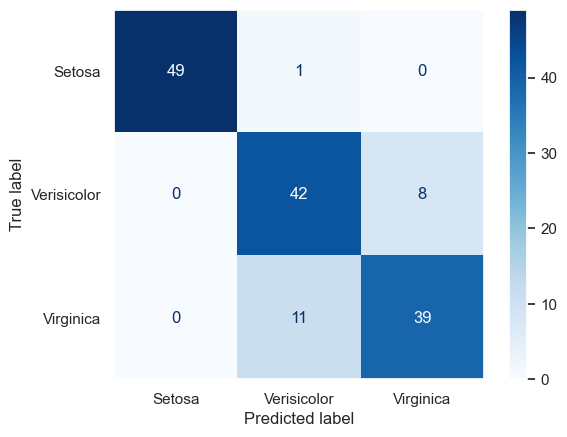

In [56]:
# If you run version 0.22 or higher of sklearn then you can plot the confusion matrix.
# Plot non-normalized confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

conf_mat = np.zeros((3,3))
for y_pred, y_true in zip(yhat, y):
    
    conf_mat[int(y_true), int(y_pred)] += 1

disp = ConfusionMatrixDisplay(conf_mat, display_labels=class_names)

# NOTE: Fill all variables here with default values of the plot_confusion_matrix
disp = disp.plot(include_values=True, cmap='Blues', ax=None)
plt.grid(None)
plt.show()